# Definition

[`WebDriverWait`](https://selenium-python.readthedocs.io/waits.html) is a *class* in the **Selenium Python library** that *allows code to wait for elements to appear on a page or for certain conditions to be met before proceeding with the execution*. It is used to wait for a specified amount of time for an element to be present on the page before interacting with it. This can be useful in situations where elements on a page may take longer to load or may be generated dynamically by `JavaScript`.

Implicit Wait and Explicit Wait are used to handle the synchronization issues that may occur when automating web applications. However, they differ in the way they handle waiting for elements to appear on the page.

In general, an [***<font color = "violet">Implicit wait</font>***](https://selenium-python.readthedocs.io/waits.html#implicit-waits) can be useful when you want to *wait for all elements on a page to load*, while an [***<font color = "cyan">Explicit wait</font>***](https://selenium-python.readthedocs.io/waits.html#explicit-waits) is more useful when you want to *wait for a specific element or condition to be met before proceeding with the execution*.



# [Implicit wait](https://selenium-python.readthedocs.io/waits.html#implicit-waits)

[***<font color = "violet">Implicit wait</font>***](https://selenium-python.readthedocs.io/waits.html#implicit-waits): An implicit wait is a type of wait that is built into Selenium and is set ***globally for the entire WebDriver instance***. Once set, the implicit wait will be in effect for the entire time the WebDriver instance is in use. It will cause Selenium to poll the DOM for a certain amount of time when trying to find an element or elements if they are not immediately available.

Using Implicit Wait <br>
Implicit Wait uses a global setup and will affecting all steps, by this setup we will write the script under the configuration file

1. Navigate to `conftest.py`
2. Navigate to the `webdriver` function generator
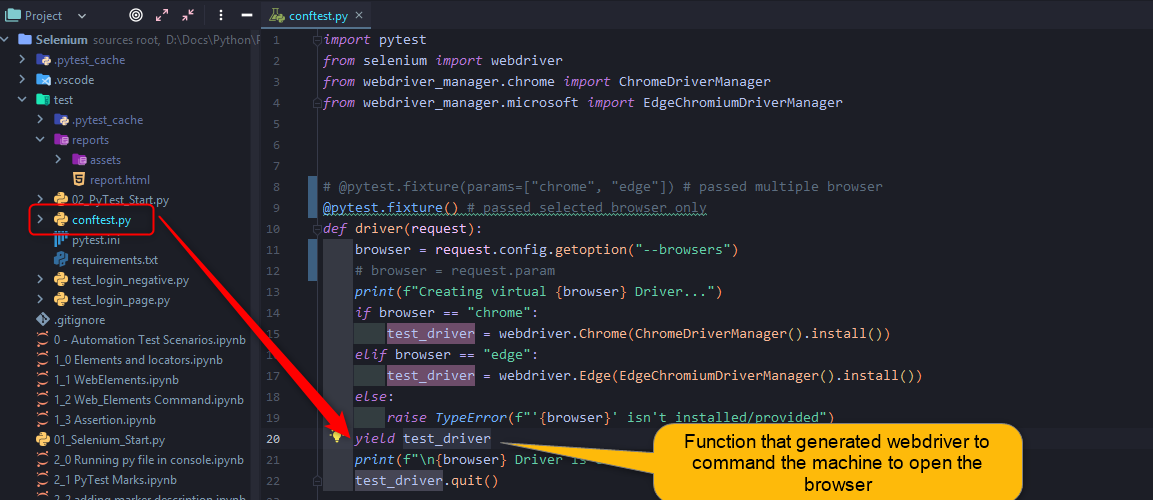
3. Add the implicit wait script before the driver is called (generate)
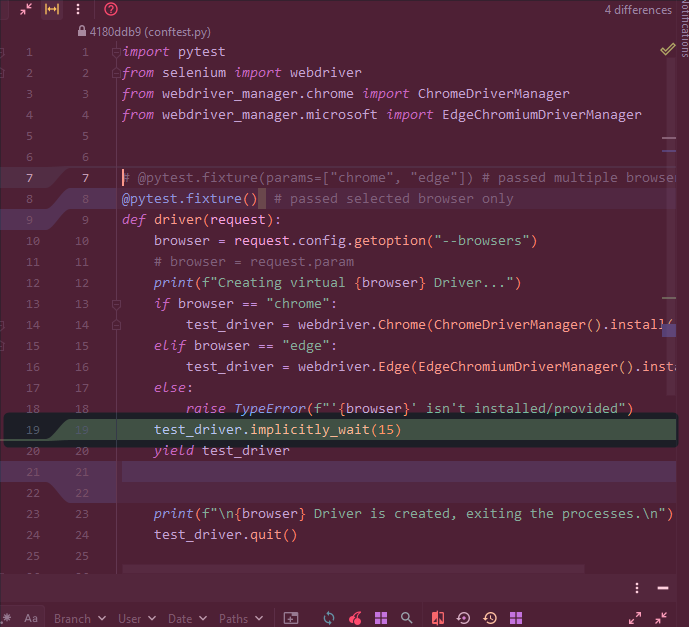
4. Run the test and see what happen

# [Explicit wait](https://selenium-python.readthedocs.io/waits.html#explicit-waits)

[***<font color = "cyan">Explicit wait</font>***](https://selenium-python.readthedocs.io/waits.html#explicit-waits): An explicit wait is a type of wait that ***is set for a specific element or elements***. It is used when you want to wait for a specific condition to be met before proceeding with the execution. It is applied only for the specific element identified and for the time specified. It can be used for the elements which are not yet loaded on the page but expected to appear.